<a href="https://colab.research.google.com/github/Felipecuestas98/Bootcamp-Mintic/blob/main/reconocimiento_de_matriculas_EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Instala librerias y bibliotecas necesarias
!pip install easyocr
!pip install imutils
!pip install opencv-python
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 12.9 MB/s eta 0:00:00


In [3]:
# Importa las librerias o bibliotecas a utilizar
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils
import random

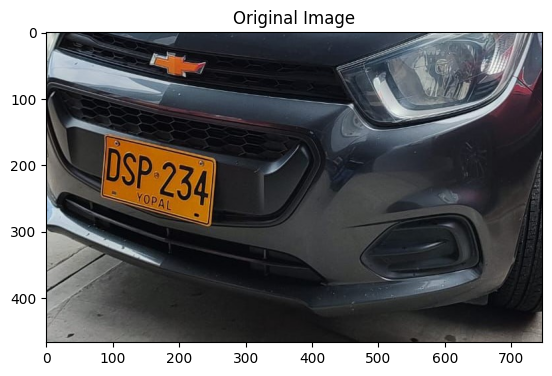

Text(0.5, 1.0, 'Processed Image')

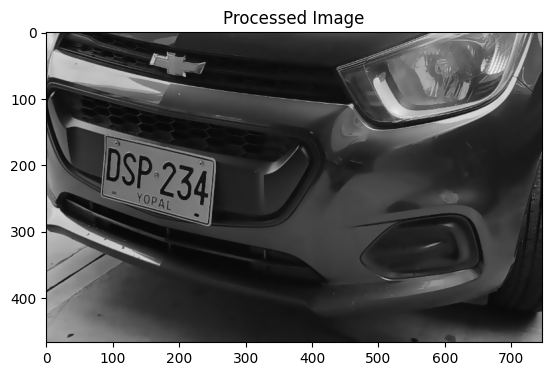

In [45]:
# Limpieza de imagen, conversion a escala de grises y reduccion de ruido
img = cv2.imread("carro_julian.jpeg") #read image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert image to gray
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB)) #show processed image
plt.title('Processed Image')

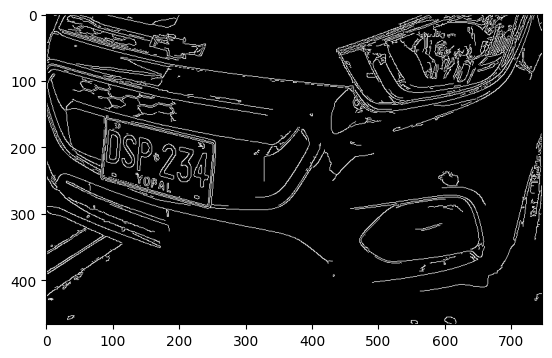

In [46]:
# Detecciond de bordes con el algoritmo de Canny
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [74]:
# identidificar contornos y aplica la marca para separar la placa, filtra los 10 contornos principales
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Find contours
contours = imutils.grab_contours(keypoints) #Grab contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #Sort contours

In [106]:
#Busca los contornos de 4 lados para poder encontrar el que mas se asemeje a la matricula del vehiculo a partir de los 10 contornos filtrados en la anterior linea de codigo.
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

print("Location: ", location)
# la salida emite las coordenadas de la matricula

Location:  [[[ 95 175]]

 [[ 90 221]]

 [[105 225]]

 [[112 188]]]


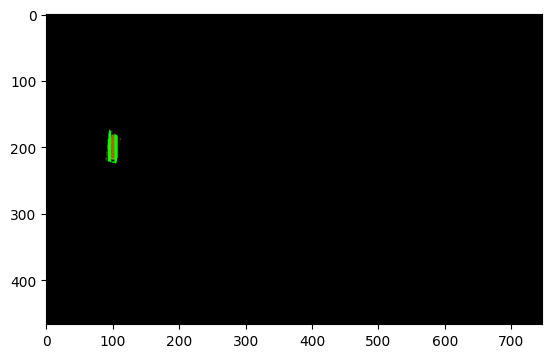

In [107]:
# enmascara la matricula para extraer texto por medio de OCR
mask = np.zeros(gray.shape, np.uint8) #create blank image with same dimensions as the original image
new_image = cv2.drawContours(mask, [location], 0,255, -1) #Draw contours on the mask image
new_image = cv2.bitwise_and(img, img, mask=mask) #Take bitwise AND between the original image and mask image

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) #show the final image

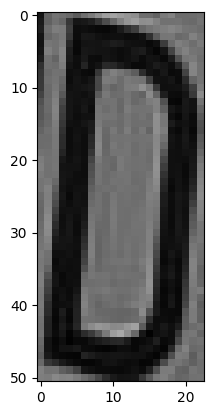

In [108]:
# corta la imagen de la matricula y la muestra de acuerdo a las coordenadas
(x,y) = np.where(mask==255) #Find the co-ordinates of the four corners of the document
(x1, y1) = (np.min(x), np.min(y)) #Find the top left corner
(x2, y2) = (np.max(x), np.max(y)) #Find the bottom right corner
cropped_image = gray[x1:x2+1, y1:y2+1] #Crop the image using the co-ordinates

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)) #show the cropped image

In [109]:
# convierte la imagen en texto para almacenar los datos
reader = easyocr.Reader(['en']) #create an easyocr reader object with english as the language
result = reader.readtext(cropped_image) #read text from the cropped image
result

[([[0, 2], [22, 2], [22, 46], [0, 46]], 'Id', 0.37992887849495366)]

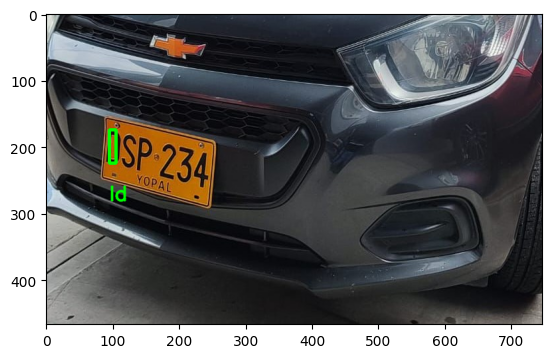

In [110]:
# encierra con un rectangulo el texto de la matricula con OpenCV
text = result[0][-2] #Extract the text from the result
font = cv2.FONT_HERSHEY_SIMPLEX #Font style
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA) #put the text on the image
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3) #Draw a rectangle around the text

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)) #show the final image with text